In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn import ensemble
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
le = preprocessing.LabelEncoder()
from sklearn.model_selection import train_test_split
import pickle
import os


data=pd.read_csv('./data/new_data.csv')

In [43]:
data.head()


,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,change,diabetesMed,readmitin30days,diabetic,f_diag,s_diag,t_diag,self_pay,medicaid/medicare,coverByInsurance
0,0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,...,No,No,0,1.0,"endocrine, nutritional and metabolic diseases,...",No Diagnosis,No Diagnosis,0,0,0
1,1,1968528,720936,Caucasian,Female,[70-80),6,25,1,10,...,Ch,Yes,0,0.0,diseases of the circulatory system,diseases of the circulatory system,"endocrine, nutritional and metabolic diseases,...",0,0,0
2,2,2223336,558360,AfricanAmerican,Female,[60-70),6,25,1,9,...,No,No,0,0.0,injury and poisoning,infectious and parasitic diseases,diseases of the musculoskeletal system and con...,0,0,0
3,3,2298006,2519748,Caucasian,Male,[60-70),6,25,1,4,...,Ch,Yes,0,0.0,diseases of the respiratory system,"endocrine, nutritional and metabolic diseases,...",diseases of the circulatory system,0,0,0
4,4,2356308,608841,AfricanAmerican,Female,[50-60),6,25,1,1,...,No,Yes,0,1.0,"endocrine, nutritional and metabolic diseases,...",diseases of the circulatory system,"endocrine, nutritional and metabolic diseases,...",0,0,0


In [48]:
data = data.drop(['Unnamed: 0','patient_nbr','encounter_id', 'payer_code', 'medical_specialty','diabetic' ], axis = 1)


KeyError: "['Unnamed: 0' 'patient_nbr' 'encounter_id' 'payer_code'\n 'medical_specialty'] not found in axis"

In [49]:
data.dtypes

race                         object
gender                       object
age                          object
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital              int64
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
number_diagnoses              int64
max_glu_serum                object
A1Cresult                    object
metformin                    object
repaglinide                  object
nateglinide                  object
chlorpropamide               object
glimepiride                  object
acetohexamide                object
glipizide                    object
glyburide                    object
tolbutamide                  object
pioglitazone                 object
rosiglitazone                object
acarbose                    

In [50]:
data['admission_type_id'] = pd.Categorical(data.admission_type_id)
data['discharge_disposition_id'] = pd.Categorical(data.discharge_disposition_id)
data['admission_source_id'] = pd.Categorical(data.admission_source_id)

cat_cols = list(data.select_dtypes(include=[object]).columns)

for col in cat_cols:
    data[col] = pd.Categorical(data[col])


In [51]:
col_to_encode = data[list(data.select_dtypes(include=['category']).columns)]


In [52]:
for col in col_to_encode:
    data[col] = le.fit_transform(data[col])


In [53]:
readmitted = data['readmitin30days']
data = data.drop('readmitin30days', axis = 1)

In [54]:
data.dtypes

race                          int64
gender                        int64
age                           int64
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital              int64
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
number_diagnoses              int64
max_glu_serum                 int64
A1Cresult                     int64
metformin                     int64
repaglinide                   int64
nateglinide                   int64
chlorpropamide                int64
glimepiride                   int64
acetohexamide                 int64
glipizide                     int64
glyburide                     int64
tolbutamide                   int64
pioglitazone                  int64
rosiglitazone                 int64
acarbose                    

In [55]:
readmitted.value_counts()

0    90409
1    11357
Name: readmitin30days, dtype: int64

In [10]:


##predict test data
#randomForest.predict(test)
model=ensemble.RandomForestClassifier(oob_score = True, random_state=0)

###Grid Search

n_estimators = [900, 1000, 1100]
max_features = ['sqrt']
max_depth = [55, 60,65]
min_samples_split = [10, 11, 12]
min_samples_leaf = [2, 3]
bootstrap = [True]
grid_para = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

grid_search_forest = GridSearchCV(model, grid_para, cv=4)
grid_search_forest.fit(data, readmitted)

bestparam= grid_search_forest.best_params_
bestscore= grid_search_forest.best_score_





In [58]:
# Fit the model
model = ensemble.RandomForestRegressor(oob_score=True, random_state = 0, **bestparam)
#model.set_params(bestparam)
model.fit(data, readmitted)
model.score(data, readmitted)

0.41342976552564054

In [22]:
print(bestparam)
print(bestscore)
#model.score(data, readmitted)


{'bootstrap': True, 'max_depth': 55, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 12, 'n_estimators': 1100}
0.8884106676100073


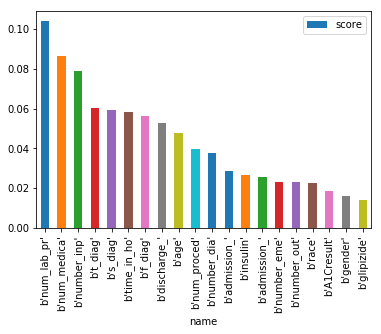

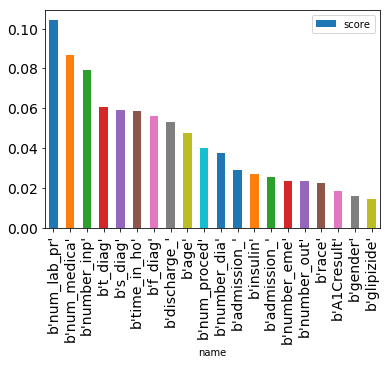

In [14]:

##feature importance
feature_importance = list(zip(data.columns, model.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
name, score = zip(*list(feature_sort))
fea_i=pd.DataFrame({'name':name,'score':score})
fea_i[:20].plot.bar(x='name', y='score')
fea_i

my_fig = fea_i[:20].plot.bar(x='name', y='score')
my_fig.tick_params(labelsize=14)
#my_fig.figure.savefig('my_fig.png', dpi=300, bbox_inches = 'tight')


In [57]:
data['random'] = np.random.randint(0,3, data.shape[0])
data['random'].value_counts()

1    34272
0    33768
2    33726
Name: random, dtype: int64

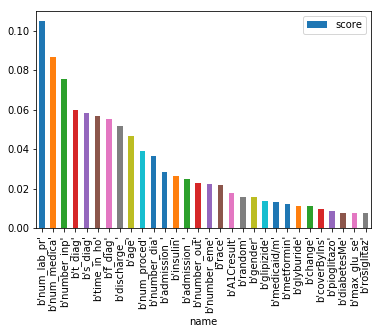

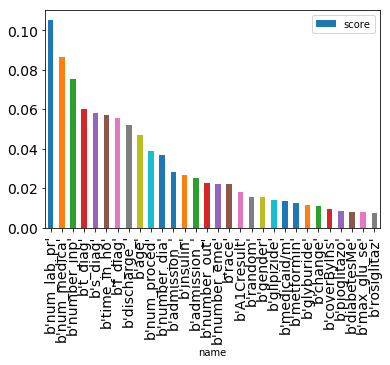

In [40]:

##feature importance
feature_importance = list(zip(data.columns, model.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
name, score = zip(*list(feature_sort))
fea_i=pd.DataFrame({'name':name,'score':score})
fea_i[:30].plot.bar(x='name', y='score')
fea_i

my_fig = fea_i[:30].plot.bar(x='name', y='score')
my_fig.tick_params(labelsize=14)
my_fig.figure.savefig('my_fig.png', dpi=300, bbox_inches = 'tight')


In [26]:
data = data.drop('random', axis = 1)